In [18]:
'''
To build a model that can detect signal anomalies in cryptocurrency trading charts,
you can use time series analysis techniques combined with anomaly detection algorithms.
Here is an example code using Python with the `pandas`, `numpy`, `matplotlib`, `statsmodels`, and `scikit-learn` libraries:

'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest


In [32]:
# Read data from the CSV file into a DataFrame
data = pd.read_csv("BTC-USD.csv")
print(data.head(0))

# Select specific columns from the DataFrame
data = data.loc[:,['Date','Open','High','Low','Close','Volume']]

# print(data.head(5))
# print(data.shape)
data.head()


Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


,Date,Open,High,Low,Close,Volume
0,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,10291200000
1,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,16846600192
2,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,16871900160
3,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,21783199744
4,2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,23840899072


In [33]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values if any
data.dropna(inplace=True)


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [34]:
# Set the 'Date' column as the index of the DataFrame
data = data.set_index('Date')
# Convert the index to datetime format
data.index = pd.to_datetime(data.index,unit='ns')
print(data.head)


<bound method NDFrame.head of                     Open          High           Low         Close  \
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...                  ...           ...           ...           ...   
2023-11-23  37420.433594  37643.917969  36923.863281  37289.621094   
2023-11-24  37296.316406  38415.339844  37261.605469  37720.281250   
2023-11-25  37721.414063  37892.429688  37617.417969  37796.792969   
2023-11-26  37796.828125  37820.300781  37162.750000  37479.121094   
2023-11-27  37454.191406  37550.773438  37164.511719  37305.851563   

                 Volume  
Date                     
2018-01

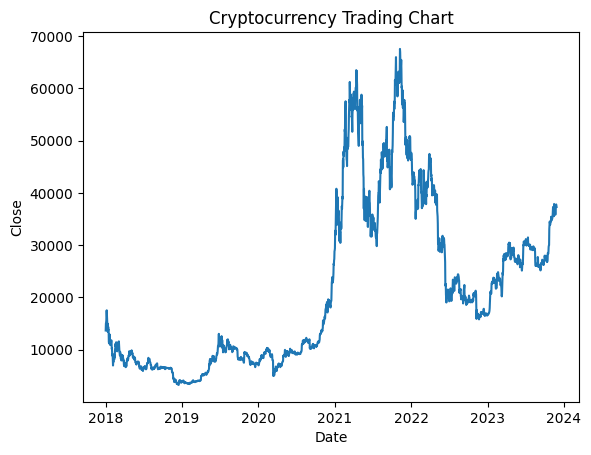

In [35]:
# Visualize the data
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Cryptocurrency Trading Chart')
plt.show()


In [36]:

# Perform time series decomposition
decomposition = seasonal_decompose(data['Close'], model='additive')

# Extract the trend, seasonality, and residuals
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

# Store the residuals in a new dataframe
df_residuals = pd.DataFrame(residuals)
df_residuals.dropna(inplace=True)

# Train an anomaly detection model using Isolation Forest
model = IsolationForest(contamination=0.01)
model.fit(df_residuals)

# Predict anomalies
anomalies = model.predict(df_residuals)


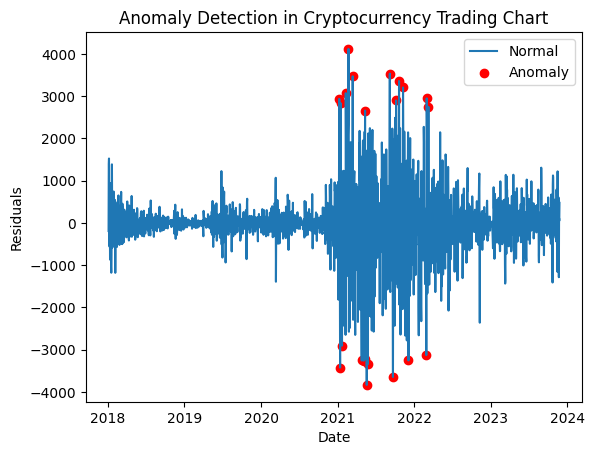

In [37]:
# Visualize the anomalies
plt.plot(df_residuals.index, df_residuals, label='Normal')
plt.scatter(df_residuals.index[anomalies == -1], df_residuals[anomalies == -1], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Anomaly Detection in Cryptocurrency Trading Chart')
plt.legend()
plt.show()


In [38]:
'''
This code assumes that you have a CSV file named 'cryptocurrency.csv' containing the cryptocurrency
trading data with columns 'timestamp' and 'price'. It first visualizes the original trading chart,
then performs time series decomposition to extract the trend, seasonality, and residuals using the `seasonal_decompose` function
from `statsmodels`. The residuals are stored in a new dataframe, which is then fed into an Isolation Forest model from `scikit-learn`
for anomaly detection. Finally, the anomalies are plotted by overlaying the predicted anomalies with the residuals plot.
'''


"\nThis code assumes that you have a CSV file named 'cryptocurrency.csv' containing the cryptocurrency\ntrading data with columns 'timestamp' and 'price'. It first visualizes the original trading chart,\nthen performs time series decomposition to extract the trend, seasonality, and residuals using the `seasonal_decompose` function\nfrom `statsmodels`. The residuals are stored in a new dataframe, which is then fed into an Isolation Forest model from `scikit-learn`\nfor anomaly detection. Finally, the anomalies are plotted by overlaying the predicted anomalies with the residuals plot.\n"